## 1. Loading the Data:

In [1]:
# import libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
# read csv file
df = pd.read_csv(r"C:\Users\adiya\Documents\Uni\Data Science\1SA-Final-Project\hotel_bookings.csv")

In [3]:
# display the first 5 rows for a quick look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Understanding the Data:

In [4]:
# check the shape of the DataFrame (rows, columns)
# understand the amount of data
df.shape

(119390, 32)

In [5]:
# displays all columns
# the None parameter displays unlimited columns
pd.set_option("display.max_columns", None)
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [6]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> In a first observation it is clear some features (for example "company",
> and "agent") consist of many null values.

In [7]:
# summary of the numerical attributes
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


> ### Features in the DataFrame:
>> 0. hotel: Resort Hotel or City Hotel
>> 1. is_cancelled: Value indicating if the booking was canceled (1) or not (0)
>> 2. lead_time: Number of days between the booking date to the arrival date
>> 3. arrival_date_year: Year of arrival date
>> 4. arrival_date_month: Month  of arrival date
>> 5. arrival_date_week: Week number according to year of arrival
>> 6. arrival_date_day: Day (in numbers) of arrival date
>> 7. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) booked for accommodation
>> 8. stays_in_week_nights: Number of week nights (Monday to Friday) booked for accommodation
>> 9. adults: Number of adults
>> 10. children: Number of children
>> 11. babies: Number of babies
>> 12. meal: Type of meal booked
>> 13. country: Country of origin
>> 14. market_segment: Market segment designation (TA- Travel Agents, TO- Tour Operators), typically
>> regarding the price sensitivity according to the type of customer
>> 15. distribution_channel: Booking distribution channel (TA- Travel Agents, T0- Tour Operators),
>> refers to how the booking was made
>> 16. is_repeated_guest: Value indication if booking name was from a repeated guest (1) or not (0)
>> 17. previous_cancellations: Number of previous bookings that were cancelled by the customer (prior to current booking)
>> 18. previous_bookings_not_canceled: Number of previous bookings not cancelled prior to current booking
>> 19. reserved_room_type: Code of room type reserved
>> 20. assigned_room_type: Code for the type of room assigned to the booking
>> 21. booking_changes: Number of changes made to the booking since entered to hotel management system
>> 22. deposit_type: Indication on if the customer made a deposit to guarantee the booking
>> 23. agent: ID of the travel agency that made the booking
>> 24. company: ID of the company or organization that made the booking or is responsible for payment
>> 25. days_in_waiting_list: Number of days booking was in the waiting list until it was confirmed to the customer
>> 26. customer_type: Type of booking
>> 27. adr: Average Daily Rate (the sum of transactions divided by the number of nights stayed)
>> 28. required_car_parking_spaces: Number of car parking spaces requested
>> 29. total_of_special_requests: Number of special requests made by the customer
>> 30. reservation_status: Last reservation status (Canceled, Check-Out, No-Show)
>> 31. reservation_status_date: Date at which the last status was set

> ##### *Understanding the features helps gain insight on how to treat null values.*

In [8]:
# further examination of null values
# the methods below calculate the number of missing values
missing_values = df.isna().sum()
missing_values = missing_values[missing_values != 0]
missing_values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [9]:
# deep copy of DataFrame
# will make changes on this copy
df2 = df.copy()

> The "company" and "agent" columns have a large amount of null values.
> Since they are irrelevant for research they can be removed.

In [10]:
# dropping "company" and "agent" columns
df2.drop(["company", "agent"], axis=1, inplace=True)

> The children column has only 4 missing values. These can be replaced with 0, suggesting
> there were no kids during the stay.

In [11]:
# replacing null values in 'children' column with 0
df2.fillna({"children": 0}, inplace=True)
# examining changes
df2['children'].isnull().sum()

0

In [12]:
df2["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NIC        1
MRT        1
DMA        1
SLE        1
NPL        1
Name: country, Length: 177, dtype: int64

> As shown above, there are 177 different countries. This indicates that the data is representative
> worldwide, contrary to a specific region.
> A quick assessment will portray a better perspective on how to treat the missing data.

In [13]:
num1 = (df2["country"].value_counts() <= 1).sum()
num10 = (df2["country"].value_counts() <= 10).sum()
num50 = (df2["country"].value_counts() <= 50).sum()
num100 = (df2["country"].value_counts() <= 100).sum()
num1000 = (df2["country"].value_counts() <= 1000).sum()

print("Number of countries with one or less instances:", num1,
      "\nNumber of countries with 10 or less instances:", num10,
      "\nNumber of countries with 50 or less instances:", num50,
      "\nNumber of countries with 100 or less instances:", num100,
      "\nNumber of countries with 1000 or less instances:", num1000)

Number of countries with one or less instances: 30 
Number of countries with 10 or less instances: 84 
Number of countries with 50 or less instances: 120 
Number of countries with 100 or less instances: 140 
Number of countries with 1000 or less instances: 162


> More than half of the instances have 50 or fewer observations in the DataFrame.
> Meanwhile, there are few countries with thousands. This shows that the countries
> are not the best option to represent results from the data since they are
> very unevenly divided. For all the reasons stated, this column is unnecessary for further
> analysis.

In [14]:
# dropping "country" column
df2.drop("country", axis=1, inplace=True)

> #### Quick look after changes:

In [15]:
# examining the changes
df2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [16]:
# checking if there are remaining null values
df2.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [17]:
# number of columns changed to 29
# number of instances is the same
df2.shape

(119390, 29)

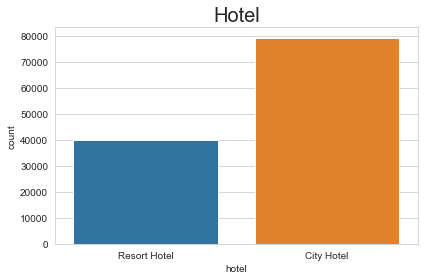

In [18]:
# a plot of the number of instances for each hotel
sns.set_style(style="whitegrid")
sns.countplot(x=df2["hotel"])
plt.title("Hotel", size=20)
plt.tight_layout()
plt.show()

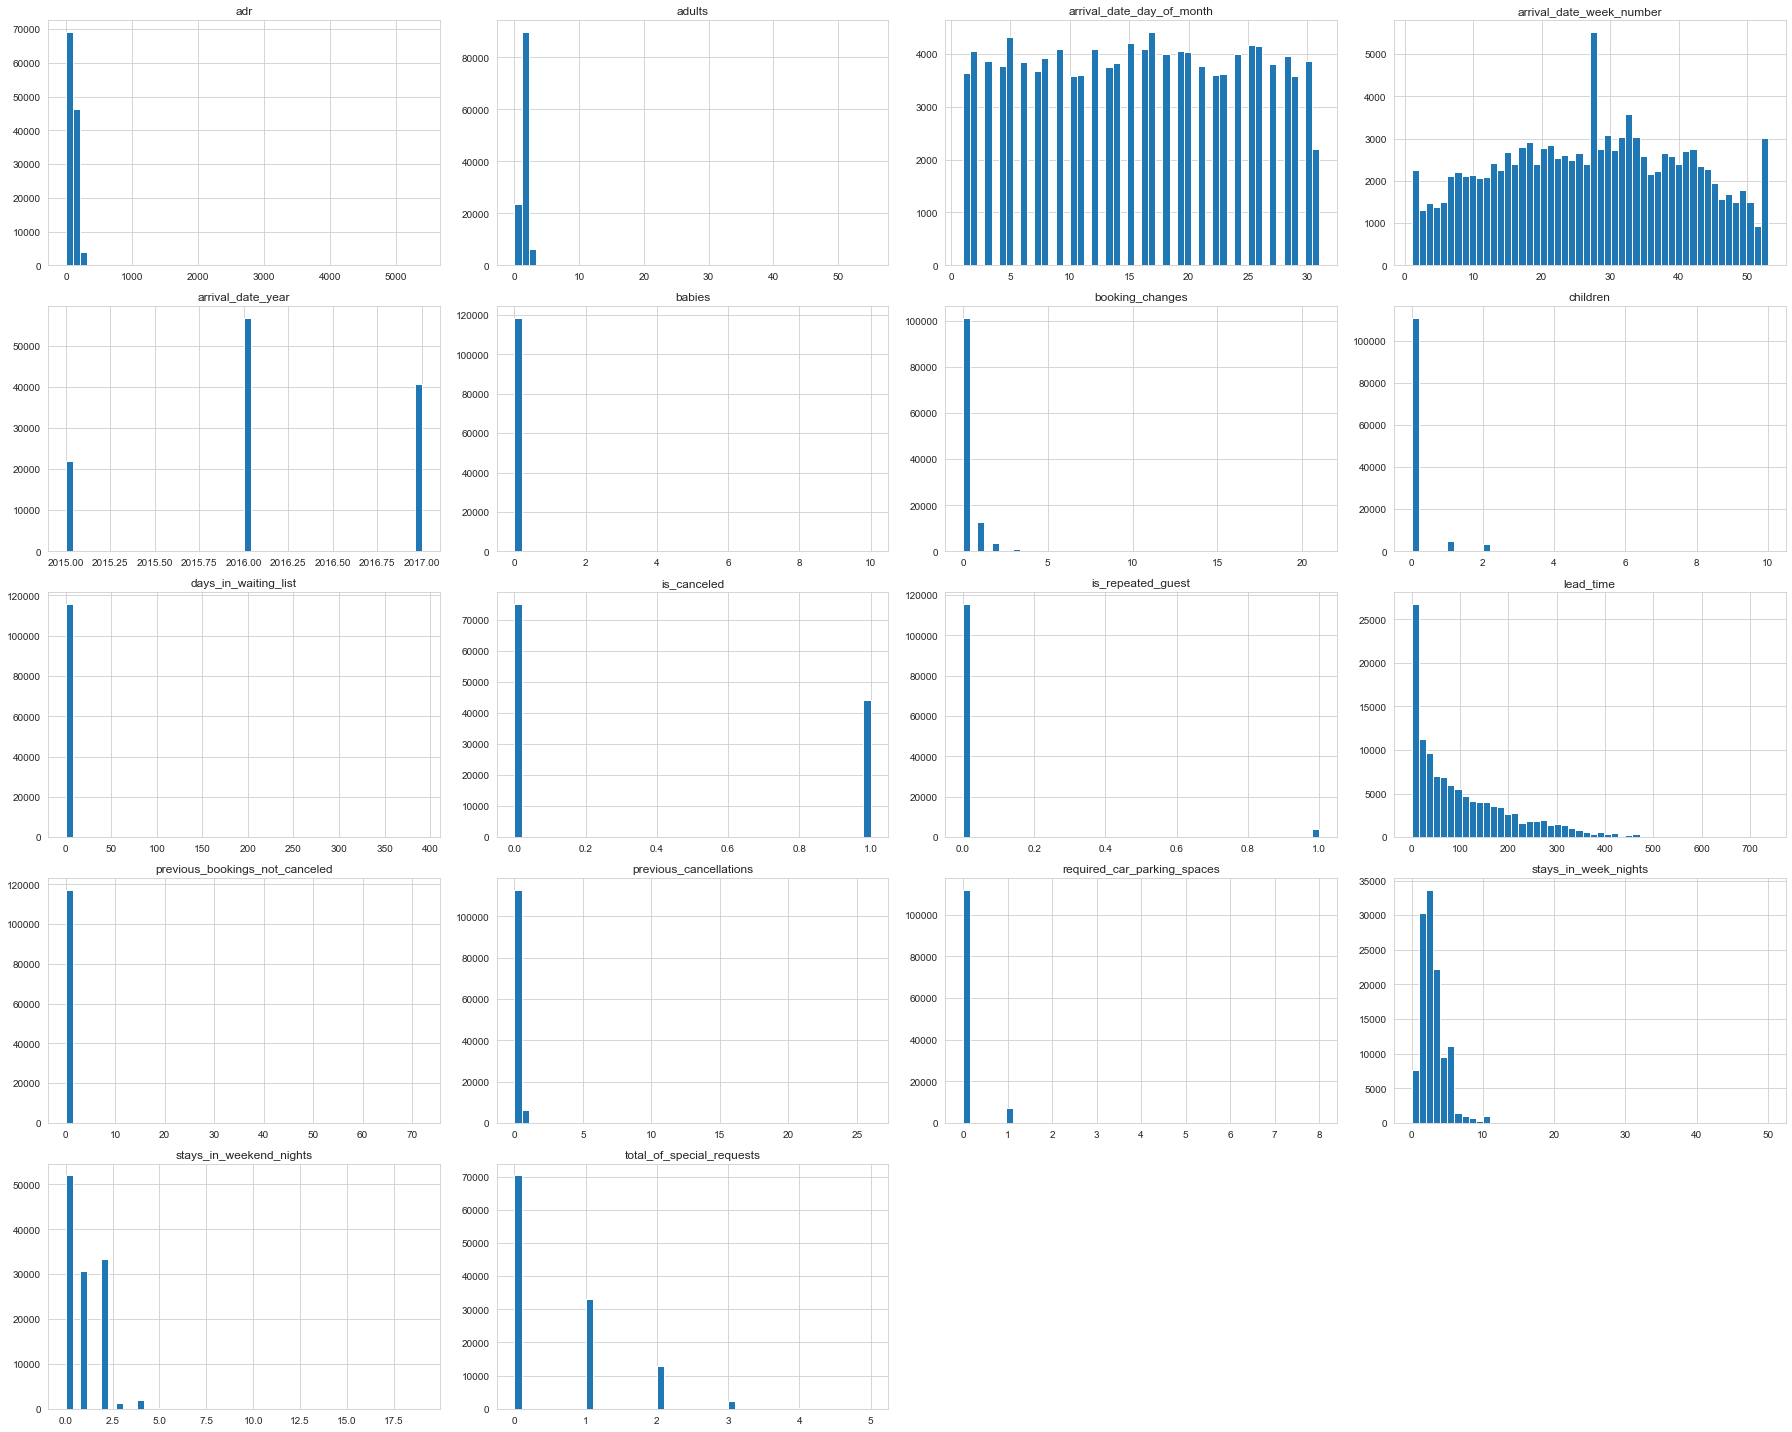

In [19]:
# a histogram plot for each numerical attribute
sns.set_style(style="whitegrid")
df2.hist(bins=50, figsize=(25,20))
plt.tight_layout()
plt.show()

> A few observations from the histograms:
>> 1. Some weeks have a large distinction from others. This could be because of holiday or summer seasons, when people tend to travel more.
>> 2. Most bookings were made shortly before arrival.
>> 3. Bookings tend to be without children or babies.
>> 4. A lot of cancellations are made.
>> 5. The longest booking are roughly two weeks long, though most accommodations are shorter.

> # Objective:
> ## Predicting if a booking will be canceled.
>> ### Chosen Feature:
>> #### *is_canceled* column
>>> 0 means the booking was not canceled
>>>
>>> 1 means the booking was canceled
>> ### Motive:
>> Hotels are a business looking to gain profit. A model that predicts if the booking
>> is highly likely to be canceled could be a good indication for hotels, as they
>> may prefer to accept the lower risk bookings first.
>>

> The set goal makes it easier to decide which columns are unnecessary and remove them
> from the DataFrame.

In [20]:
print("meal:", df2["meal"].unique(),"\n")
print("market_segment:", df2["market_segment"].unique(), "\n")
# print("previous_bookings_not_canceled", df2["previous_bookings_not_canceled"].unique(), "\n")
print("reserved_room_type:", df2["reserved_room_type"].unique(),"\n")
print("assigned_room_type:", df2["assigned_room_type"].unique(),"\n")
print("booking_changes:", df2["booking_changes"].unique(), "\n")
print("days_in_waiting_list", df2["days_in_waiting_list"].unique(), "\n")
print("customer_type:", df2["customer_type"].unique(), "\n")
print("required_car_parking_spaces:", df2["required_car_parking_spaces"].unique(),"\n")
print("total_of_special_requests", df2["total_of_special_requests"].unique(),"\n")
print("reservation_status:", df2["reservation_status"].unique(),"\n")
print("reservation_status_date:")
print(df["reservation_status_date"].head(5),
      "\nunique values:", df2["reservation_status_date"].unique().size)

meal: ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] 

reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B'] 

assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K'] 

booking_changes: [ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18] 

days_in_waiting_list [  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36] 

customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group'] 

required

> * "meal", "reserved_room_type", "assigned_room_type", "customer_type",
> "required_car_parking_spaces", "total_of_special_requests"
> are all features that lack information, and therefore we can not fully understand
> what they mean or how they affect cancellations.
>
> * "market_segment" lacks information such as when and how the price sensitivity
> is decided.
> * "previous_bookings_not_canceled" is the opposite of the research subject. The column
> "previous_cancellations" provides more relevant information.
>
> * "booking_changes" include the number of changes from the moment the booking was
> entered into the hotel management system. Changes could also be added during the stay,
> which is why this column is not the best fit for predictions.
>
> * "adr" will be 0 if the booking was canceled, which would ultimately ruin the
> prediction.
>
> * "reservation_status", "reservation_status_date" provide information after the stay.
> The goal is to predict cancellation prior to arrival.

In [21]:
# columns_1 = ["hotel", "is_canceled", "arrival_date_year", "arrival_date_month",
#              "arrival_date_week_number", "arrival_date_day_of_month",
#              "stays_in_weekend_nights", "stays_in_week_nights", "adults",
#              "children", "babies", "distribution_channel", "is_repeated_guest",
#              "previous_cancellations", "previous_bookings_not_canceled",
#              "deposit_type", "days_in_waiting_list"]
#
# column_extractor_1 = ColumnExtractor(columns_1)
# df2 = column_extractor_1.fit(df).transform(df)

In [22]:
# dropping unnecessary columns
df2.drop(["meal", "market_segment", "reserved_room_type",
         "assigned_room_type", "booking_changes", "adr",
         "customer_type", "required_car_parking_spaces", "total_of_special_requests",
         "reservation_status", "reservation_status_date"], axis=1, inplace=True)

In [23]:
# examining the changes
df2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,Direct,0,0,0,No Deposit,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,Direct,0,0,0,No Deposit,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,Direct,0,0,0,No Deposit,0


In [24]:
df2.shape

(119390, 18)

> ### Splitting the Data:
>> Before further analysis I will split the data into a training set and a testing set.
This will ensure avoidance of bias that could occur from learning the data as a whole.

In [25]:
# the reason for selecting 0.15 as the test size is because there is a large of data
# the random state parameter ensures that data will be the split the same way in each run
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df2, test_size=0.15, random_state=42)

In [26]:
print("Number of instances in training set: ", len(train_set))
print("Number of instances in testing set: ", len(test_set))

Number of instances in training set:  101481
Number of instances in testing set:  17909


## 3. Cleaning and Visualizing the Data:
> ##### *The motivation for this section is to gain more insights.*

In [27]:
# creating a deep copy of the training set
df3 = train_set.copy()

In [28]:
df3.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list
24840,Resort Hotel,0,156,2016,May,23,30,1,5,2,0.0,0,TA/TO,0,0,0,No Deposit,0
6904,Resort Hotel,0,292,2016,July,29,10,1,0,2,0.0,0,TA/TO,0,0,0,No Deposit,0


> In an earlier observation there were certain weeks when booking increased.
> Changing the months' column to numerical attributes would allow a more
> general view of when this tends to occur.

> ### Monthly Cancellations:

In [29]:
# function converts months in column to numbers
def arrival_date_month_to_int(data):
    data["arrival_date_month"] = pd.to_datetime(data["arrival_date_month"], format="%B").dt.month
    return

In [30]:
# converting months to integers
arrival_date_month_to_int(df3)

In [31]:
# examining the changes
df3.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list
24840,Resort Hotel,0,156,2016,5,23,30,1,5,2,0.0,0,TA/TO,0,0,0,No Deposit,0
6904,Resort Hotel,0,292,2016,7,29,10,1,0,2,0.0,0,TA/TO,0,0,0,No Deposit,0


<Figure size 432x288 with 0 Axes>

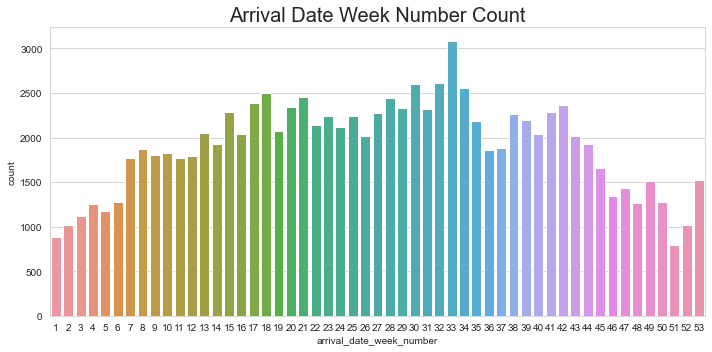

<Figure size 432x288 with 0 Axes>

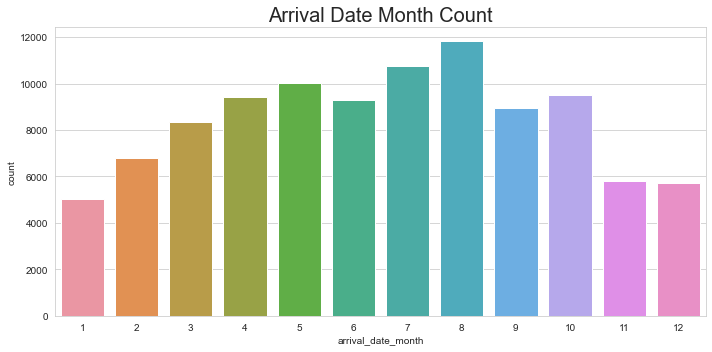

In [32]:
# count plot of instances per week number
plt.figure(0)
plt.figure(figsize=(10,5))
sns.countplot(df3["arrival_date_week_number"])
plt.title("Arrival Date Week Number Count", size=20)
plt.tight_layout()
plt.show()

# count plot of instances per month
plt.figure(1)
plt.figure(figsize=(10,5))
sns.countplot(x=df3["arrival_date_month"])
plt.title("Arrival Date Month Count", size=20)
plt.tight_layout()

plt.show()

In [33]:
# using groupby to divide months according to cancellation status
months = df3[["arrival_date_month", "is_canceled"]]
months_group = months.groupby("is_canceled")
months_group_1 = months_group.get_group(1)
months_group_0 = months_group.get_group(0)

In [34]:
# creating a DataFrame for each binary outcome total according to months
months_df_0 = pd.value_counts(months_group_0["arrival_date_month"])
months_df_0.sort_index(inplace=True)
months_df_1 = pd.DataFrame(pd.value_counts(months_group_1["arrival_date_month"]))
months_df_1.sort_index(inplace=True)

In [35]:
# creating new DataFrame with both outcomes per month
df_months_cancellation = pd.DataFrame(index=range(1,13))
df_months_cancellation["not_canceled"] = months_df_0
df_months_cancellation["canceled"] = months_df_1
df_months_cancellation

,not_canceled,canceled
1,3493,1524
2,4546,2256
3,5683,2684
4,5597,3838
5,6060,3982
6,5463,3826
7,6748,3990
8,7390,4438
9,5435,3493
10,5905,3612


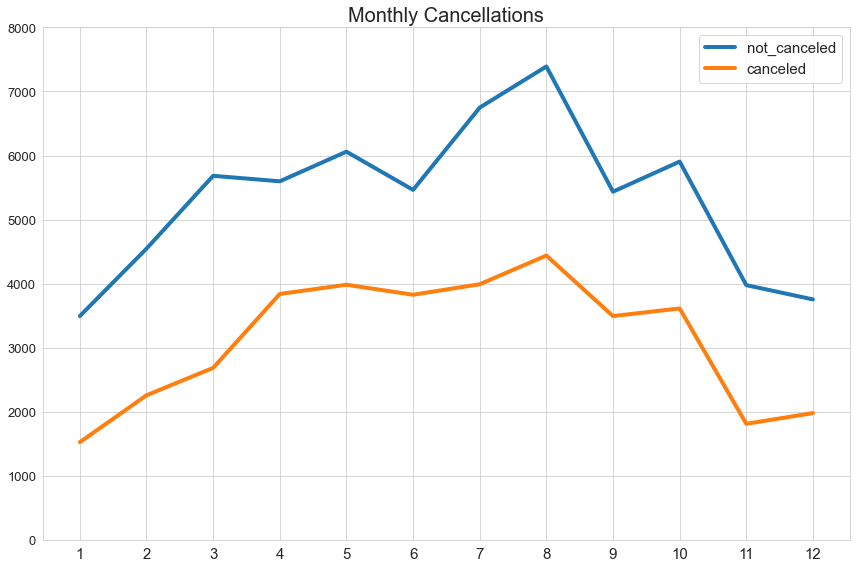

In [36]:
# plot of value count per monthly cancellations
sns.set_style(style="whitegrid")
df_months_cancellation.plot(figsize=(12,8), lw=4)
plt.title("Monthly Cancellations", size=20)
plt.xticks(range(1,13), size=15)
plt.yticks(np.arange(0,9000, step=1000), size=13)
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.show()

In [37]:
# calculating monthly cancellation values percentage
monthly_cancellation_values = []
for i in df_months_cancellation.index:
    a = df_months_cancellation["canceled"][i]
    b = df_months_cancellation["not_canceled"][i]
    monthly_cancellation_values.append([i, round(a/(a+b)*100, 4)])
cancel_per = pd.DataFrame(monthly_cancellation_values, columns=["month", "cancellation %"])
cancel_per.set_index("month")

,cancellation %
month,
1,30.3767
2,33.1667
3,32.0784
4,40.6783
5,39.6535
6,41.1885
7,37.1578
8,37.5211
9,39.1241


> #### Monthly Cancellations Conclusion:
> The amount of cancellations a month is nearly the same percentage.
> For instance, when bookings peak during August the cancellations rate increases too.
> Therefore, we can not predict cancellations according to dates.

> ### Cancellations According to Deposit Type:

In [38]:
df3["deposit_type"].value_counts()

No Deposit    89037
Non Refund    12304
Refundable      140
Name: deposit_type, dtype: int64

In [39]:
deposit_percent = round(df3["deposit_type"].value_counts()/len(df["deposit_type"])*100,4)
deposit_percent

No Deposit    74.5766
Non Refund    10.3057
Refundable     0.1173
Name: deposit_type, dtype: float64

In [40]:
deposit_cat = df3[["deposit_type"]]
deposit_cat.head(10)

,deposit_type
24840,No Deposit
6904,No Deposit
1873,No Deposit
20584,No Deposit
113582,No Deposit
50524,No Deposit
47714,No Deposit
72174,Non Refund
14644,No Deposit
82993,No Deposit


In [41]:
# using encoder to convert the "deposit_type" category into numbers
from sklearn.preprocessing import OrdinalEncoder

# function changes converts deposit type feature to numbers
def deposit_ordinal_encoder(data):
    ordinal_encoder = OrdinalEncoder(categories=[["Non Refund", "Refundable", "No Deposit"]])
    data["deposit_type"] = ordinal_encoder.fit_transform(data[["deposit_type"]])
    return ordinal_encoder.categories_

In [42]:
# function returns categories that were encoded
deposit_encoded_cat = deposit_ordinal_encoder(df3)
deposit_encoded_cat

[array(['Non Refund', 'Refundable', 'No Deposit'], dtype=object)]

> The choice to convert the column into integers is to give each deposit type a
> unique ranking.
>
> If the customer is labeled without a deposit, they could make reservations knowing they
> are free to decide anytime if they want to cancel, or perhaps not show at all.
> This category is the riskiest, which the reason it is labeled 2.
>
> Refundable is labeled as 1. The customer likely paid in advance which indicates they
> are more serious about visiting. Getting a refund would require extra effort in order to
> contact the hotel.
>
> Lastly, the label non refund was given a 0. The customer will likely make an effort to
> come in order to prevent loosing their money, and the hotel profits even if the
> customer does not show. This is a low risk for the hotel.

In [43]:
df3.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list
24840,Resort Hotel,0,156,2016,5,23,30,1,5,2,0.0,0,TA/TO,0,0,0,2.0,0
6904,Resort Hotel,0,292,2016,7,29,10,1,0,2,0.0,0,TA/TO,0,0,0,2.0,0


In [44]:
df3["deposit_type"].value_counts()

2.0    89037
0.0    12304
1.0      140
Name: deposit_type, dtype: int64

In [45]:
# using groupby to divide according to deposit types
deposit = df3.groupby(by="deposit_type")
non_refund = deposit.get_group(0)
refundable = deposit.get_group(1)
no_deposit = deposit.get_group(2)

In [46]:
# calculating number of cancellations according to deposit type
no_deposit_0 = (no_deposit["is_canceled"]==0).sum()
no_deposit_1 = (no_deposit["is_canceled"]==1).sum()
non_refund_0 = (non_refund["is_canceled"]==0).sum()
non_refund_1 = (non_refund["is_canceled"]==1).sum()
refundable_0 = (refundable["is_canceled"]==0).sum()
refundable_1 = (refundable["is_canceled"]==1).sum()
all_canceled = no_deposit_1 + non_refund_1 + refundable_1
all_not_canceled = no_deposit_0 + non_refund_0 + refundable_0

In [47]:
# checking that all values were calculated
all_canceled + all_not_canceled == df3["deposit_type"].size

True

In [48]:
df_deposit_type = pd.DataFrame(index=["Not Canceled", "Canceled"])
df_deposit_type["no_deposit"] = [no_deposit_0, no_deposit_1]
df_deposit_type["non_refund"] = [non_refund_0, non_refund_1]
df_deposit_type["refundable"] = [refundable_0, refundable_1]
df_deposit_type

,no_deposit,non_refund,refundable
Not Canceled,63860,81,108
Canceled,25177,12223,32


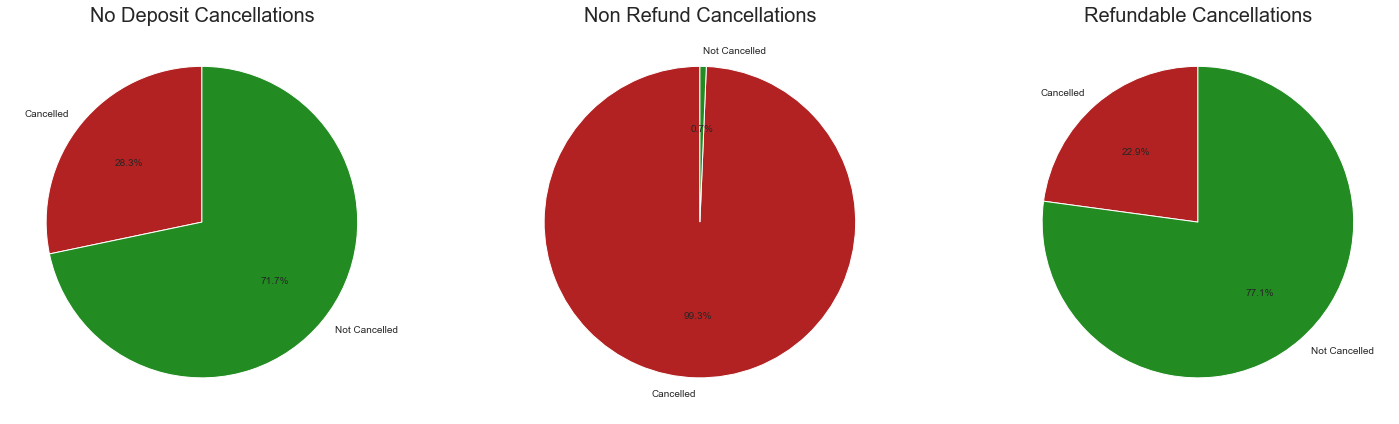

In [49]:
cancel_labels = ["Cancelled", "Not Cancelled"]
fig, dx = plt.subplots(1,3, figsize=(21,6))
dx[0].pie(np.array([no_deposit_1, no_deposit_0]), labels=cancel_labels,
            autopct='%1.1f%%', startangle=90, colors=['firebrick', 'forestgreen'])
dx[0].set_title("No Deposit Cancellations", size=20)
dx[1].pie(np.array([non_refund_1, non_refund_0]), labels=cancel_labels,
            autopct='%1.1f%%', startangle=90, colors=['firebrick', 'forestgreen'])
dx[1].set_title("Non Refund Cancellations", size=20)
dx[2].pie(np.array([refundable_1, refundable_0]), labels=cancel_labels,
            autopct='%1.1f%%', startangle=90, colors=['firebrick', 'forestgreen'])
dx[2].set_title("Refundable Cancellations", size=20)
plt.tight_layout()
plt.show()

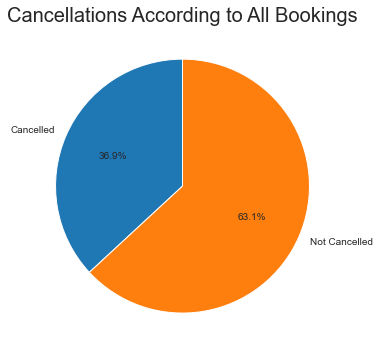

In [50]:
# plot of cancellations percentage according to all bookings
plt.figure(figsize=(10,5))
plt.pie(np.array([all_canceled, all_not_canceled]), labels=cancel_labels,
        autopct='%1.1f%%', startangle=90)
plt.title("Cancellations According to All Bookings", size=20)
plt.tight_layout()
plt.show()

> #### Cancellations According to Deposit Type Conclusion:
> The non refund values and graph looks a bit off. It almost seems as if the values
> for cancellation were switched!
>
> In light of this, it could be better to evaluate the model both with and without this
> feature.

> ### Cancellations According to Distribution Channel

In [51]:
distribution_percent = round(df3["distribution_channel"].value_counts()/len(df["distribution_channel"])*100,4)
distribution_percent

TA/TO        69.7303
Direct       10.3962
Corporate     4.7341
GDS           0.1349
Undefined     0.0042
Name: distribution_channel, dtype: float64

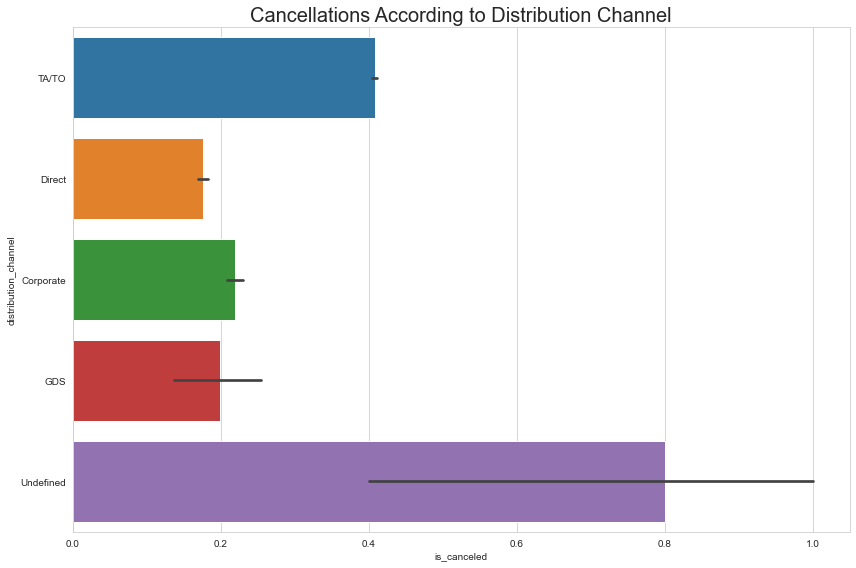

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(y=df3["distribution_channel"], x=df3["is_canceled"])
plt.title("Cancellations According to Distribution Channel", size =20)
plt.tight_layout()
plt.show()

In [53]:
# using groupby to divide according to distribution channels
dist_channel = df3.groupby(by="distribution_channel")
dist_channel["is_canceled"].describe()

,count,mean,std,min,25%,50%,75%,max
distribution_channel,,,,,,,,
Corporate,5652.0,0.218861,0.413510,0.0,0.0,0.0,0.0,1.0
Direct,12412.0,0.176039,0.380869,0.0,0.0,0.0,0.0,1.0
GDS,161.0,0.198758,0.400310,0.0,0.0,0.0,0.0,1.0
TA/TO,83251.0,0.408091,0.491483,0.0,0.0,0.0,1.0,1.0
Undefined,5.0,0.800000,0.447214,0.0,1.0,1.0,1.0,1.0


In [54]:
cancel_ = df3.groupby(by="is_canceled")
cancel_["distribution_channel"].describe()

,count,unique,top,freq
is_canceled,,,,
0,64049,5,TA/TO,49277
1,37432,5,TA/TO,33974


> #### Cancellations According to Distribution Channel Conclusion:
> The graph and calculations show that the distribution channel does not have much
> impact on the cancellations rate.
> At a first glance it may look like "Undefined" could be a good indication,
> the count value is only 5 instances.

> ### Exploring Similar Columns:
> Some columns are similar and can be combined to one new column. This can provide
> a wider view of the data.

In [55]:
# function adds column to the DataFrame with the total nights stayed
def add_nights_stayed(data):
    nights_stayed = data["stays_in_week_nights"] + data["stays_in_weekend_nights"]
    data["nights_stayed"] = nights_stayed.astype(int)
    return

In [56]:
add_nights_stayed(df3)

In [57]:
# checking amount of instances with no logged adults and nights stayed
df3[(df3["adults"]==0) & (df3["nights_stayed"]==0)].size

1064

In [58]:
# function removes instances where both adults and nights stayed columns are zero
def remove_zero_adults_nights(data):
    df_rem = data[(data["adults"]!=0) & (data["nights_stayed"]!=0)]
    return df_rem

In [59]:
# using function to remove instances
df3 = remove_zero_adults_nights(df3)

In [60]:
# function adds column to the DataFrame with the sum of all guests
def add_num_guests(data):
    number_of_guests = data["adults"] + data["children"] + data["babies"]
    data["number_of_guests"] = number_of_guests.astype(int)
    return

In [61]:
add_num_guests(df3)

<ipython-input-60-e94fc1b2a5de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["number_of_guests"] = number_of_guests.astype(int)


In [62]:
# examining changes
df3.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list,nights_stayed,number_of_guests
24840,Resort Hotel,0,156,2016,5,23,30,1,5,2,0.0,0,TA/TO,0,0,0,2.0,0,6,2
6904,Resort Hotel,0,292,2016,7,29,10,1,0,2,0.0,0,TA/TO,0,0,0,2.0,0,1,2


In [63]:
# most guests come in pairs
df3["number_of_guests"].value_counts()

2     69133
1     19071
3      8901
4      3342
5       115
26        5
27        2
12        2
50        1
40        1
20        1
6         1
Name: number_of_guests, dtype: int64

In [64]:
# the average stay is 3-4 nights
df3["nights_stayed"].describe()

count    100575.00000
mean          3.44173
std           2.53211
min           1.00000
25%           2.00000
50%           3.00000
75%           4.00000
max          60.00000
Name: nights_stayed, dtype: float64

> #### Looking Back:
> Let's summarize the changes made so far.
>
>> Two columns were added:
>> * nights_stayed combined the number of week and weekend nights stayed.
>> * number_of_guests added the total amount of adults, children and babies listed.
>>
>> We also removed the instances with zero adults and zero nights stayed.

> Now that we have taken a look at a few features and added new columns to give a
> wider perspective, lets look at the correlations.

In [65]:
corr_matrix = df3.drop(["adults", "children", "babies",
                  "stays_in_week_nights", "stays_in_weekend_nights"],
                 axis=1, inplace=False).corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.290817
previous_cancellations            0.109798
days_in_waiting_list              0.052900
number_of_guests                  0.044460
nights_stayed                     0.016452
arrival_date_year                 0.016022
arrival_date_month                0.011518
arrival_date_week_number          0.008657
arrival_date_day_of_month        -0.005958
previous_bookings_not_canceled   -0.056037
is_repeated_guest                -0.077068
deposit_type                     -0.479961
Name: is_canceled, dtype: float64

> ### Cancellations According to Lead Time:

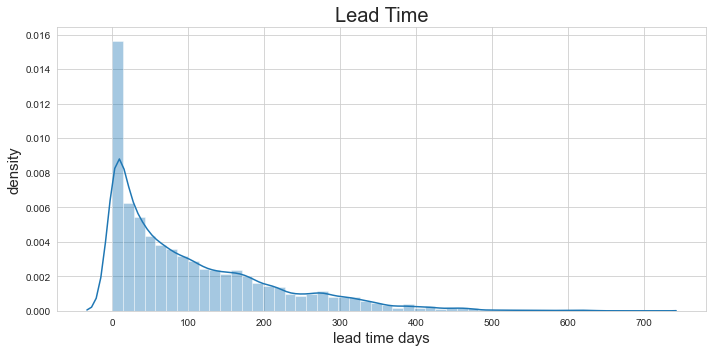

In [66]:
plt.figure(figsize=(10,5))
lead_time = df3['lead_time']
lead_time = pd.DataFrame(sorted(lead_time, reverse = True), columns = ['Lead'])
sns.distplot(lead_time)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.ylabel("density", size=15)
plt.tight_layout()
plt.show()

> The graph above shows that most bookings are 100 days or less ahead of the arrival.
> The peak is around 0-10 days ahead of booking.

In [67]:
lead_time_100 = df3[df3["lead_time"] < 100]
lead_time_100_365 = df3[(df3["lead_time"] >= 100) & (df3["lead_time"] < 365)]
lead_time_365 = df3[df3["lead_time"] >= 365]

In [68]:
cancel_100 = lead_time_100["is_canceled"].value_counts()
cancel_100_365 = lead_time_100_365["is_canceled"].value_counts()
cancel_365 = lead_time_365["is_canceled"].value_counts()

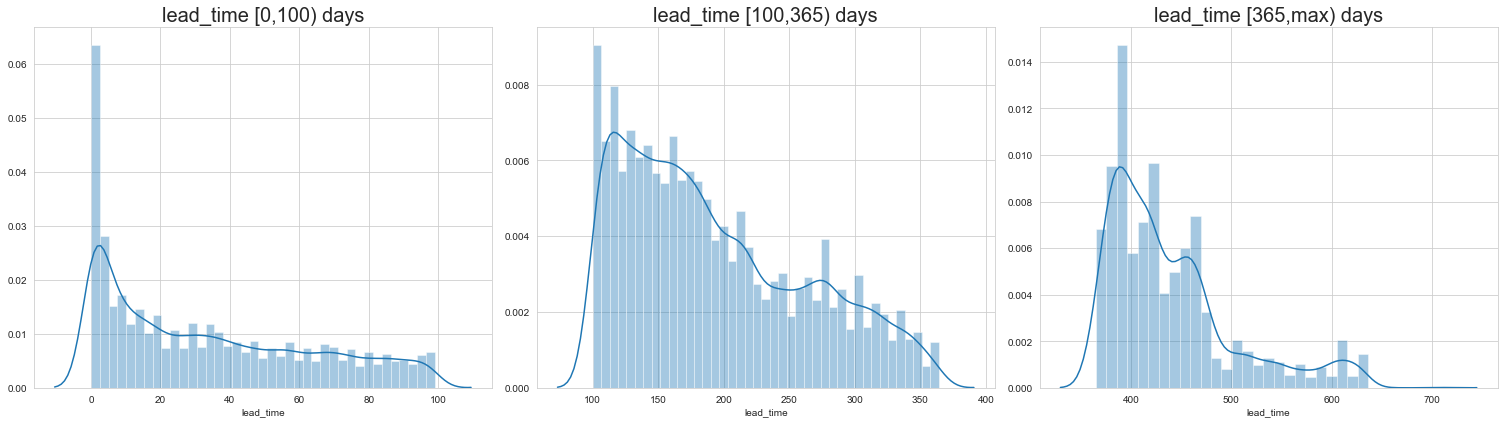

In [69]:
fig, bx = plt.subplots(1,3,figsize=(21,6))
sns.distplot(lead_time_100["lead_time"], ax = bx[0])
bx[0].set_title("lead_time [0,100) days", size=20)
sns.distplot(lead_time_100_365["lead_time"], ax = bx[1])
bx[1].set_title("lead_time [100,365) days", size=20)
sns.distplot(lead_time_365["lead_time"], ax = bx[2])
bx[2].set_title("lead_time [365,max) days", size=20)
plt.tight_layout()
plt.show()

In [70]:
total_lead_days_cancel = pd.DataFrame(data=[cancel_100,cancel_100_365,cancel_365],
             index=["[0,100) days", "[100,365) days", "[365,max) days"])
total_lead_days_cancel

,0,1
"[0,100) days",43504,16766
"[100,365) days",18882,18697
"[365,max) days",870,1856


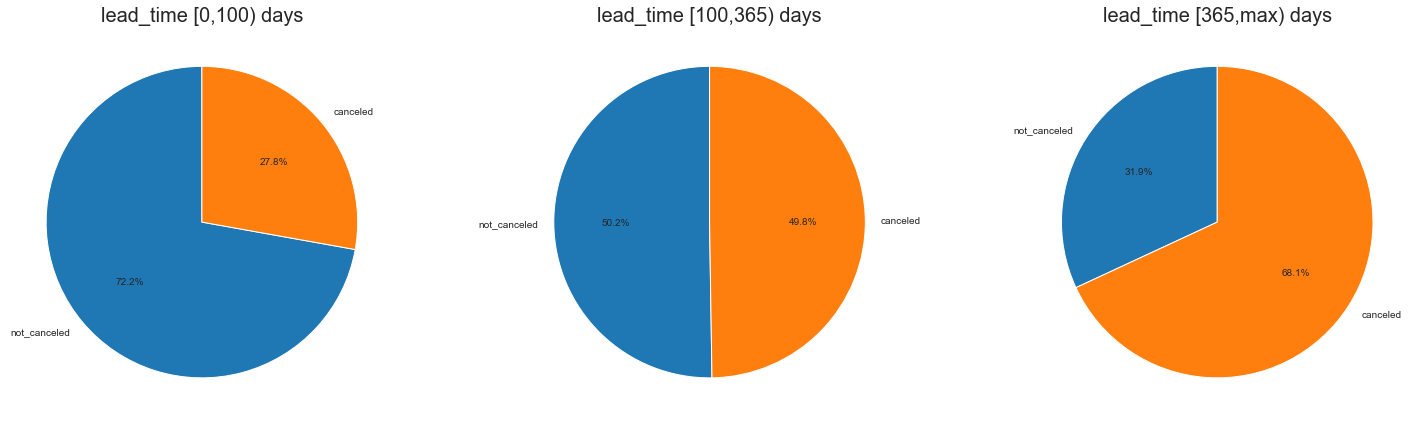

In [71]:
fig, ax = plt.subplots(1,3, figsize=(21,6))
ax[0].pie(np.array([total_lead_days_cancel[0][0], total_lead_days_cancel[1][0]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("lead_time [0,100) days", size=20)
ax[1].pie(np.array([total_lead_days_cancel[0][1], total_lead_days_cancel[1][1]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("lead_time [100,365) days", size=20)
ax[2].pie(np.array([total_lead_days_cancel[0][2], total_lead_days_cancel[1][2]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90)
ax[2].set_title("lead_time [365,max) days", size=20)
plt.tight_layout()
plt.show()

> ### Cancellations According to Lead Time:
>> #### Observations:
>> * Most bookings occur 5 days prior to arrival.
>> * When the lead time is larger the chances for cancellation increase.
>> * The amount of booking steady overall between 20-100 days, then drops.
>> #### Conclusion:
>> This column is informative about cancellations.

> ### Cancellations According to Previous Cancellations:

In [72]:
prev_cancel = df3["previous_cancellations"]

In [73]:
prev_cancel.value_counts().sort_index()

0     95105
1      5104
2        99
3        48
4        29
5        15
6        22
11       30
13        8
14       11
19       17
21        1
24       45
25       20
26       21
Name: previous_cancellations, dtype: int64

In [74]:
print("Cancellation Rates:\n")
print('Never canceled =' ,str(round(df3[df3['previous_cancellations']==0]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Canceled once =' ,str(round(df3[df3['previous_cancellations']==1]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Canceled more than 10 times:',str(round(df3[df3['previous_cancellations']>10]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Canceled more than 11 times:' ,str(round(df3[df3['previous_cancellations']>11]
                                            ['is_canceled'].mean()*100,2))+' %')

Cancellation Rates:

Never canceled = 33.97 %
Canceled once = 94.44 %
Canceled more than 10 times: 85.62 %
Canceled more than 11 times: 99.19 %


In [75]:
prev_cancel_index = df3["previous_cancellations"].value_counts().index.to_list()
prev_cancel_index.sort()

percentage_prev_cancel= []
for i in prev_cancel_index:
    percentage_prev_cancel.append((round(df3[df3["previous_cancellations"]==i]
                                        ["is_canceled"].mean()*100,2)))
percentage_prev_cancel

[33.97,
 94.44,
 34.34,
 29.17,
 24.14,
 13.33,
 31.82,
 30.0,
 87.5,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [76]:
df_prev_cancel = pd.DataFrame(percentage_prev_cancel, index=prev_cancel_index, columns=["Previous Cancellations %"])
df_prev_cancel

,Previous Cancellations %
0,33.97
1,94.44
2,34.34
3,29.17
4,24.14
5,13.33
6,31.82
11,30.00
13,87.50
14,100.00


<Figure size 864x576 with 0 Axes>

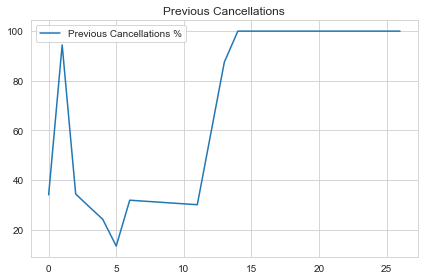

In [77]:
plt.figure(figsize=(12,8))
df_prev_cancel.plot()
plt.title("Previous Cancellations")
plt.tight_layout()
plt.show()

> ### Cancellations According to Previous Cancellations Conclusion:
> The percentages show that when there are more previous cancellations, there is
> a substantially higher chance the customer will cancel again.

> ### Cancellations According to Repeated Guests:

In [78]:
rep_guest = df3["is_repeated_guest"]
rep_guest.value_counts()

0    97628
1     2947
Name: is_repeated_guest, dtype: int64

In [79]:
rep_guest_index = df3["is_repeated_guest"].value_counts().index.to_list()
rep_guest_index.sort()

percentage_rep_guest= []
for i in rep_guest_index:
    percentage_rep_guest.append((round(df3[df3["is_repeated_guest"]==i]
                                        ["is_canceled"].mean()*100,2)))
percentage_rep_guest

[37.75, 15.68]

In [80]:
df_rep_guest = pd.DataFrame(percentage_rep_guest, index=[rep_guest_index], columns=["Repeated Guest Cancellation %"])
df_rep_guest

,Repeated Guest Cancellation %
0,37.75
1,15.68


In [81]:
print("Repeated Guests Cancellation Rates:\n")
print('Not Repeated (0) =' ,str(round(df3[df3['is_repeated_guest']==0]
                                            ['is_canceled'].mean()*100,2))+' %')
print('Repeated (1) =' ,str(round(df3[df3['is_repeated_guest']==1]
                                            ['is_canceled'].mean()*100,2))+' %')

Repeated Guests Cancellation Rates:

Not Repeated (0) = 37.75 %
Repeated (1) = 15.68 %


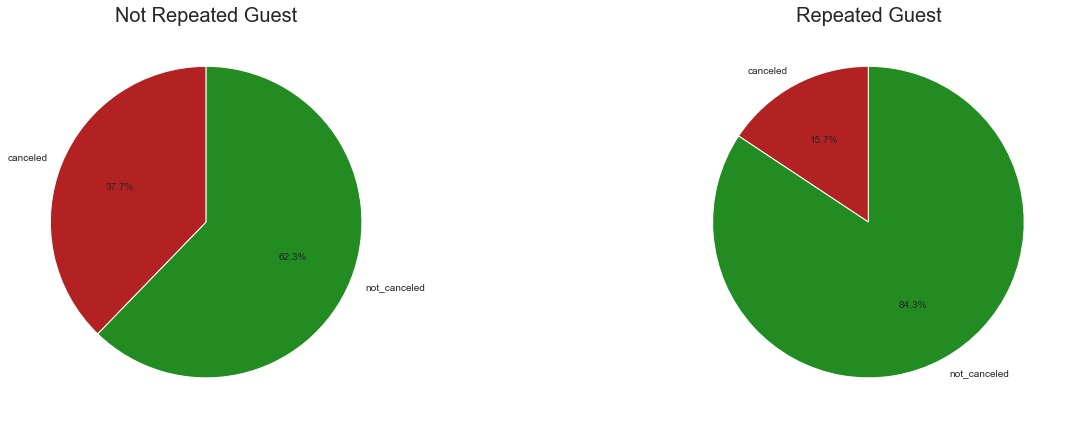

In [82]:
fig, cx = plt.subplots(1,2, figsize=(21,6))
cx[0].pie(np.array([percentage_rep_guest[0], 100-percentage_rep_guest[0]]),
          labels=["canceled", "not_canceled"], autopct='%1.1f%%', startangle=90,
          colors=['firebrick', 'forestgreen'])
cx[0].set_title("Not Repeated Guest", size=20)
cx[1].pie(np.array([percentage_rep_guest[1], 100-percentage_rep_guest[1]]),
          labels=["canceled", "not_canceled"], autopct='%1.1f%%', startangle=90,
          colors=['firebrick', 'forestgreen'])
cx[1].set_title("Repeated Guest", size=20)
plt.tight_layout()
plt.show()

In [83]:
# percentage of all cancellations when the guest was not repeated
percentage_rep_guest[0] / (percentage_rep_guest[0] + percentage_rep_guest[1])

0.7065319109114729

In [84]:
# percentage of all cancellations when the guest was repeated
percentage_rep_guest[1] / (percentage_rep_guest[0] + percentage_rep_guest[1])

0.29346808908852706

> ### Cancellations According to Repeated Guest Conclusion:
> Out of all bookings there is a higher chance the cancellation is a non-repeated guest.
> Furthermore, when looking only at the cancellations there were approximately 70% that non-repeated guests
> that cancelled and 30% that canceled that were repeated.

## 4. Preparing the Data
> Predictors: lead_time, previous_cancellations, is_repeated_guest
>
> Labels: is_canceled

In [85]:
hotel_pred = ["lead_time", "previous_cancellations", "is_repeated_guest"]
hotel_labels = ["is_canceled"]

In [86]:
X_train = train_set.drop(hotel_labels, axis=1)
y_train = train_set[hotel_labels].copy()

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import TransformerMixin

In [88]:
# returns DataFrame containing subset columns we want to work with
class ColumnExtractor(TransformerMixin):

    def __init__(self, cols=hotel_pred):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xcols = X[self.cols]
        return Xcols

In [89]:
full_pipeline = Pipeline([
    ("ColumnExtractor", ColumnExtractor()),
    ("MinMaxScaler", MinMaxScaler())
])

In [90]:
X_train = full_pipeline.fit_transform(X_train)
X_train

array([[0.21166893, 0.        , 0.        ],
       [0.39620081, 0.        , 0.        ],
       [0.08276798, 0.        , 0.        ],
       ...,
       [0.10040706, 0.        , 0.        ],
       [0.17639077, 0.        , 0.        ],
       [0.02170963, 0.        , 0.        ]])